In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [90]:
%load_ext autoreload
%autoreload 2

In [16]:
df = pd.read_csv("gtd_4.1.17-5.14.17.csv")

In [17]:
df.head()

,event_id,event_date,country,region,provstate,summary,weapdetail,source
0,201705030013,2017-05-03,Libya,Middle East & North Africa,Benghazi,05/03/2017: An explosive device detonated in A...,NaN,"""Hosted Product: Libya Press Review Security T..."
1,201705030014,2017-05-03,Pakistan,South Asia,Punjab,05/03/2017: An explosive device detonated near...,NaN,"""Pakistan: Three peace body members injured in..."
2,201705030015,2017-05-03,Pakistan,South Asia,Balochistan,05/03/2017: Assailants opened fire on the vehi...,NaN,"""Highlights: Pakistan Balochistan Press 04 May..."
3,201705030016,2017-05-03,Mali,Sub-Saharan Africa,Timbuktu,05/03/2017: Assailants fired projectiles at a ...,Mortars and rockets were used in the attack.,"""Jihadists Claim Mali Attack That Killed UN Pe..."
4,201705030018,2017-05-02,Afghanistan,South Asia,Ghor,05/02/2017: Assailants abducted 13 members of ...,NaN,"""Taliban abduct 13 relatives of ALP commander ..."


In [18]:
def get_substring(s):
    return s[12:]

In [19]:
df['summary'] = df['summary'].apply(get_substring)
df.head()

,event_id,event_date,country,region,provstate,summary,weapdetail,source
0,201705030013,2017-05-03,Libya,Middle East & North Africa,Benghazi,An explosive device detonated in Al Sabri neig...,NaN,"""Hosted Product: Libya Press Review Security T..."
1,201705030014,2017-05-03,Pakistan,South Asia,Punjab,An explosive device detonated near the convoy ...,NaN,"""Pakistan: Three peace body members injured in..."
2,201705030015,2017-05-03,Pakistan,South Asia,Balochistan,Assailants opened fire on the vehicle of Maste...,NaN,"""Highlights: Pakistan Balochistan Press 04 May..."
3,201705030016,2017-05-03,Mali,Sub-Saharan Africa,Timbuktu,Assailants fired projectiles at a United Natio...,Mortars and rockets were used in the attack.,"""Jihadists Claim Mali Attack That Killed UN Pe..."
4,201705030018,2017-05-02,Afghanistan,South Asia,Ghor,Assailants abducted 13 members of a local poli...,NaN,"""Taliban abduct 13 relatives of ALP commander ..."


In [20]:
df.dtypes

event_id       int64
event_date    object
country       object
region        object
provstate     object
summary       object
weapdetail    object
source        object
dtype: object

In [24]:
df['event_date'] = pd.to_datetime(df['event_date'])
df['month_year']= df['event_date'].dt.to_period('M')

In [114]:
summary_time = pd.pivot_table(df,
                              index=['month_year'],
                              values='event_id',
                              aggfunc='count')
summary_time.reset_index()

,month_year,event_id
0,2017-04,865
1,2017-05,390


In [116]:
total = sum(summary_time['event_id'])
total

1255

There are a total of 1255 terrorist attacks around the world in the period of time from April 1 2017 to May 15 2017.
The total number of attacks in both months seem similar, since for half of May, we see roughly half the number of attacks as in April.

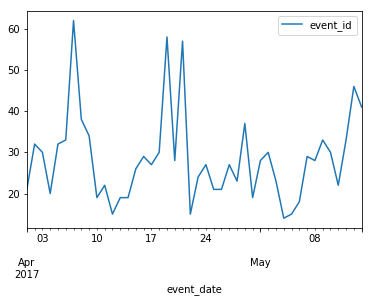

In [33]:
summary_date = pd.pivot_table(df,
                              index=['event_date'],
                              values='event_id',
                              aggfunc='count')
summary_date.reset_index()
summary_date.plot()

Overtime, the number of attacks fluctuated. In particular, number of attacks peaked for 3 dates
(04/07/2017, 04/19/2017, 04/21/2017). There does not seem to be a pattern over time.

In [117]:
summary_date

,event_id
event_date,
2017-04-01,21
2017-04-02,32
2017-04-03,30
2017-04-04,20
2017-04-05,32
2017-04-06,33
2017-04-07,62
2017-04-08,38
2017-04-09,34


In [118]:
summary_country = pd.pivot_table(df,
                                 index=['country'],
                                 values='event_id',
                                 aggfunc='count')
summary_country.reset_index()
summary_country['% out of total'] = summary_country['event_id'] / total * 100
summary_country.sort_values(by='event_id', ascending=False).head(10)

,event_id,% out of total
country,,
Iraq,270,21.513944
Afghanistan,140,11.155378
India,109,8.685259
Somalia,90,7.171315
Pakistan,85,6.772908
Thailand,76,6.055777
Philippines,73,5.816733
Nigeria,52,4.143426
Nepal,41,3.266932


Country that accounts for the most number of attacks worldwide is Iraq with 270 attacks in 1 and a half month, accounting for 21% of attacks worldwide. Most countries in the top 10 most attacked list have been mentioned constantly in the news. The 3 most surprising countries, in my opinion, are Thailand, the Philippines and Nepal and I would like to dig deeper into the nature of attacks in these countries.

In [112]:
import string
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
def transform_str(text):
    text = text.replace('were used in the attack', '')
    new_text = text.strip().split()
    word_list = []
    for word in new_text:
        if (word not in stopwords) and (word not in string.punctuation):
            word_list.append(word)
    return word_list

df['weapdetail'] = df['weapdetail'].astype('str')
df['weapon'] = df['weapdetail'].apply(transform_str)
df.head(30)

,event_id,event_date,country,region,provstate,summary,weapdetail,source,month_year,weapon
0,201705030013,2017-05-03,Libya,Middle East & North Africa,Benghazi,An explosive device detonated in Al Sabri neig...,nan,"""Hosted Product: Libya Press Review Security T...",2017-05,[nan]
1,201705030014,2017-05-03,Pakistan,South Asia,Punjab,An explosive device detonated near the convoy ...,nan,"""Pakistan: Three peace body members injured in...",2017-05,[nan]
2,201705030015,2017-05-03,Pakistan,South Asia,Balochistan,Assailants opened fire on the vehicle of Maste...,nan,"""Highlights: Pakistan Balochistan Press 04 May...",2017-05,[nan]
3,201705030016,2017-05-03,Mali,Sub-Saharan Africa,Timbuktu,Assailants fired projectiles at a United Natio...,Mortars and rockets were used in the attack.,"""Jihadists Claim Mali Attack That Killed UN Pe...",2017-05,"[Mortars, rockets]"
4,201705030018,2017-05-02,Afghanistan,South Asia,Ghor,Assailants abducted 13 members of a local poli...,nan,"""Taliban abduct 13 relatives of ALP commander ...",2017-05,[nan]
5,201705090003,2017-05-09,Iraq,Middle East & North Africa,Nineveh,Assailants attacked Iraqi Volunteer Forces sol...,nan,"""5 killed in Daesh attacks in Iraqï¿½s Mosul,""...",2017-05,[nan]
6,201705030020,2017-05-03,India,South Asia,Maharashtra,An explosive device detonated near a Maharasht...,nan,"""Maharashtra: One cop killed, 19 personnel inj...",2017-05,[nan]
7,201705030021,2017-05-03,India,South Asia,Maharashtra,Assailants opened fire on a Maharashtra Police...,nan,"""Gadchiroli police commando killed in landmine...",2017-05,[nan]
8,201705030022,2017-05-03,Syria,Middle East & North Africa,Aleppo,An explosives-laden vehicle detonated near a S...,nan,"""Explosion near Turkish border kills five,"" Sp...",2017-05,[nan]
9,201705030023,2017-05-03,Afghanistan,South Asia,Balkh,An explosive device detonated as an assailant ...,A roadside bomb was used in the attack.,"""Taliban militant killed while planting roadsi...",2017-05,"[A, roadside, bomb, used, attack.]"


I was having some difficulty installing wordcloud. I have found the following
chunks of codes that would be good in visualizing the most common words in "summary."

In [ ]:
text = data['summary']
def get_wordcloud(text):
    text = text.dropna()
    text = text.to_string()
    text = re.sub(' +',' ',text)
    wordcloud = WordCloud(mask = mask).generate(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0,y=0)
    plt.show()

Ideally, if I had more time I would continue working on the following things:
* Find a new way to categorize the weapon columns so that I am able to divide the "weapdetail" column into multiple sub columns, and run an analysis on the type of weapon per attack per country. That would be used as a proxy for the level of violence of the attack.
* Extracting casualty level from the "summary" free text - I have not found a way to do this yet but I will keep looking and email you an updated version.